---
<font color='Blue' size="4">
F37.101 컴퓨팅 기초: 처음 만나는 컴퓨팅(First Adventures in Computing)</font>

---



# Chapter 10. Numpy



:::{admonition} 학습목표와 기대효과
:class: info  
- 학습목표
  - 배열을 생성해보고 다뤄보자.
  - 배열과 리스트의 차이를 알아보자.
  - Shallow copy와 Deep Copy를 이해하자.

- 기대효과
  - 다수의 데이터를 저장하기 위해 적절한 자료형을 선택할 수 있고 다룰 수 있다.
:::

## 배열(Array)

- numpy는 Number와 python의 합성어이다.
- 행렬이나 대규모 다차원 배열을 쉽고 빠르게 처리할 수 있도록 하는 파이썬 라이브러리이며, 간단한 기능부터 계산과학 분야의 복잡한 연산을 지원하기 위한 기능들까지 포함되어 있다.
- 행렬은 행과 열이 있는 것, 배열은 행렬을 여러개 쌓아올린 것이다.
- numpy의 배열에는 모두 동일한 자료형만 저장이 가능하다.

- numpy를 사용하기 위해서는 import로 모듈을 불러와야한다.
- 공공연한 약속처럼 numpy모듈은 보통 np라는 별칭으로 불리운다.
- 별칭은 as라는 키워드를 사용하여 만든다.



In [1]:
import numpy as np

### 1-D array(벡터) 생성하기

- 1차원 배열부터 만들어보자.
- numpy모듈에서는 배열을 생성하는 다양한 방법을 지원한다.
  - numpy 모듈의 `array()`를 통해 배열을 만들 수 있다.
  - numpy 모듈의 `arange()`를 통해 배열을 만들 수 있다.


```
np.array(리스트 or range())
np.arange(start, end, step)
```



In [2]:
ar1 = np.array([10,25,36,41,59])
ar11 = np.array(range(10))
ar111 = np.arange(1,6)


### 2-D array(매트릭스, 행렬) 생성하기

- 2차원 배열은 행(Row)과 열(Column)로 구성되어 있다.
<div align="center"><img src="https://haesunbyun.github.io/common/images/array.png" style="width:400px;"></div>

- 행은 가로 방향으로 줄을 세운 것이며, 열은 세로 방향으로 줄을 세운 것이다.
- 2차원 배열은 array()에 중첩 리스트를 넣어주거나, arange()로 1차원 배열을 만든 후 배열모양을 바꿔주는 reshape()을 통해서 2차원 배열을 생성할 수 있다.

```
np.array([리스트 of 리스트])
np.arange(start,end,step).reshape(row, column)
```
- 여기서 row는 행의 개수, column은 열의 개수이다.
- 이때 column을 -1로 써주면 각 행에 들어갈 데이터의 개수를 똑같이 적용해준다. 이를 위해서는 배열 원소의 개수와 row*column의 개수가 같아야 한다.

In [3]:
ar2 = np.array([[1,2,3], [4,5,6], [7,8,9], [10,11,12]])
ar22 = np.arange(1,13).reshape(4,3)
ar222 = ar2.reshape(3,-1)


### 3-D array(텐서) 생성하기
- 3차원 배열은 면(page), 행, 열을 가진다.
- 생성하는 방법은 2차원 배열과 유사하지만 리스트가 3번 중첩된다.

```
np.array([리스트 of 리스트 of 리스트])
np.arange(start,end,step).reshape(page, row, column)
```

In [4]:
ar3 = np.array([[[1,2,3], [4,5,6]],
                [[7,8,9], [10,11,12]]])


😄3차원 배열 생성하기1


다음과 같은 배열을 생성하시오.


```
[[[100  90  80]
  [ 70  60  50]]

 [[ 15  25  35]
  [ 45  55  65]]

 [[ 11  22  33]
  [ 44  55  66]]]
```



- 3차원 배열의 열의 개수는 `len(배열명[면인덱스,행인덱스])`로 확인할 수 있다.


In [5]:
print(f'number of pages: {len(ar3)}')
print(f'number of rows: {len(ar3[0])}')
print(f'number of columns: {len(ar3[0,0])}')

number of pages: 2
number of rows: 2
number of columns: 3


- 배열의 구성, 차수 등의 정보를 확인하기 위해서는 다음과 같은 변수를 쓸 수 있다.

```
배열명.ndim
배열명.shape
배열명.size
```
  - ndim: 배열의 축 또는 차원의 개수
  - shape: 배열의 모양이며, (m,n)형식으로 나타난다.
  - size: 배열 원소의 개수. shape내의 원소의 크기의 곱과 같다. 즉 shape의 m*n은 size와 같다.

In [6]:
print(ar3.ndim)
print(ar3.shape)
print(ar3.size)

3
(2, 2, 3)
12


## Numpy의 응용

- numpy로 만든 배열은 다양한 목적을 위해 사용되지만 선형 그래프를 그리기 위해 배열을 활용하는 하나의 예를 보도록 하자.
- 그래프를 그리기 위한 수식은 다음과 같다.

> $y=2x^2-3x+1$


- 파이썬으로 그래프를 그리기 위해서는 matplotlib.pyplot 모듈을 불러와야 한다.
- matplotlib.pyplot 모듈은 보통 plt라는 별칭으로 불리운다.
- plt의 plot()은 선형그래프를 그리는 함수이다.
- 파이썬에서는 그래프를 그렸다고 해서 화면에 바로 보여주지 않는다. plt.show()는 그래프를 화면에 보여주는 함수이다.


```
plt.plot(x축 데이터, y축 데이터)
```

In [7]:
import matplotlib.pyplot as plt
x = np.arange(0, 5, 0.1)
y = 2*(x**2)-3*x+1
plt.plot(x, y)
plt.show()

<Figure size 640x480 with 1 Axes>

### Vectorization operation
1차원으로 묶은 수를 수학에서 벡터(vector)라고 한다.
벡터연산은 벡터의 동일 인덱스에 위치한 원소들끼리 연산을 수행하는 기능이다.
numpy에서는 사칙연산, 논리연산, 비교연산에 대해 모두 벡터연산을 지원한다.

- 모든 사칙연산에 대해 벡터연산을 한다.

In [8]:
a = np.array([1,2,3])
b = np.array([4,5,6])
print(a+b)
print(a-b)
print(a*b)
print(a/b)

[5 7 9]
[-3 -3 -3]
[ 4 10 18]
[0.25 0.4  0.5 ]


- 행렬끼리 연산할때 크기가 다른 경우 이를 자동으로 확대해 주는 기능을 브로드캐스팅이라고 한다.

<div align="center"><img src="https://haesunbyun.github.io/common/images/broadcasting.png" style="width:400px;"></div>

In [9]:
ar0 = np.arange(12).reshape(4, 3)
ar1 = np.arange(3)
ar2 = np.arange(4).reshape(4, 1)
print(ar0, '\n\n', ar1, '\n\n', ar2)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]] 

 [0 1 2] 

 [[0]
 [1]
 [2]
 [3]]


In [10]:
ar0 + ar1

array([[ 0,  2,  4],
       [ 3,  5,  7],
       [ 6,  8, 10],
       [ 9, 11, 13]])

In [11]:
ar0 + ar2

array([[ 0,  1,  2],
       [ 4,  5,  6],
       [ 8,  9, 10],
       [12, 13, 14]])

- 모든 비교연산에 대해 벡터연산을 한다.

In [12]:
print(b>10)
print((b%2)==1)

[False False False]
[False  True False]


- 모든 논리연산에 대해 벡터연산을 한다.
그러나 and, or, not 연산자 기호를 쓰지 않는다.
- 기호 이외에 별도의 논리적인 연산을 할 수 있는 함수(logical_and(), logical_or(),logical_not()..)도 존재한다.
  - and는 `&`,
  - or는 `|`,
  - not은 `~`로 쓴다.

In [13]:
a = np.array([160,175,157])
c = np.array(['여','여','남'])
print((a>162) | (c=='여'))

[ True  True False]


## 배열과 리스트의 비교
- 얼핏 비슷해 보이지만 완전히 기능이 다른
파이썬의 리스트(list)와 numpy의 배열(array)의 차이를 간단히 비교해보자.

- 리스트와 배열의 생성에서,
  - 리스트는 정수, 실수, 문자열, 리스트 등 다양한 자료형을 하나의 리스트에 담을 수 있다.
  - 배열은 동일한 자료형만 하나의 배열에 담을 수 있다.
  - 타입은,
    - 리스트는 list 타입이다.
    - 배열은 numpy.ndarray 타입이다.
- 출력형태
  - 리스트는 대괄호안에 콤마(,)로 아이템을 구분한다.
  - 배열은 대괄호안에 구분기호 없이 공백으로만 원소를 구분한다.

In [14]:
its_list = ['바나나', '딸기', 100, 5.5,['BTS', '블랙핑크']]
its_array = np.array([1, 2, 3.0])
its_array1 = np.array([1, 2, '3.0'])
its_array2 = np.array([1, 2, None])
print(its_list)
print(its_array)
print(its_array1)
print(its_array2)
print(type(its_list), type(its_array), type(its_array1), type(its_array2))

['바나나', '딸기', 100, 5.5, ['BTS', '블랙핑크']]
[1. 2. 3.]
['1' '2' '3.0']
[1 2 None]
<class 'list'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


- 리스트와 배열에 곱셈연산을 해보았을 때,
  - 리스트에서 곱셈은 리스트를 이어 붙이는 concatenate이다. 즉, 각 원소에 곱셈을 하지 않는다.
  - 배열은 각 원소에 벡터연산을 한다.


In [15]:
print(its_list*2)
print('========')
print(its_array*2)

['바나나', '딸기', 100, 5.5, ['BTS', '블랙핑크'], '바나나', '딸기', 100, 5.5, ['BTS', '블랙핑크']]
[2. 4. 6.]


- 리스트와 배열의 메서드
  - 리스트와 배열은 자료형이 다르므로 지원하는 메서드의 종류도 다르다.
  - 예를 들어, 리스트에서는 mean, argmax, round 등의 메소드를 지원하지 않는다. 그 이유는 리스트에는 다양한 자료형을 저장할 수 있는데 예를 들어, 문자열의 평균, 최대값, 소수점 처리를 할 수 없기 때문이다.
    - mean: 평균
    - argmax: 최대값 인덱스
    - round: 숫자를 지정한 자리수로 반올림
    - ...
  - 반면, 배열에서는 append, remove, extend 등 리스트 메소드를 지원하지 않는다.
    - append: 원소 추가
    - remove: 원소 삭제
    - extend: 리스트 확장

- 리스트와 배열의 연산속도
  - 리스트와 배열의 연산속도를 확인해보자.
  - 억개의 숫자에 대해서 2를 곱했다.
  - 결과를 보면 배열(array)가 10배 이상 빠르다.
  - 배열은 동일한 자료형만 저장하므로 데이터 저장에 필요한 저장공간이 일정하며 연속적이다. 따라서 메모리 주소 측면에서 인덱스를 통해 빠르게 데이터에 접근할 수 있다.
  - 반면, 리스트는 다양한 자료형을 저장할 수 있어서 필요한 저장공간이 일정하지 않으며, 메모리 활동공간도 연속적이지 않다. 인덱스를 갖지만 이는 몇 번째 데이터인가 정도를 의미한다.

```python
import time
a = list(range(10 ** 8))

start = time.time()
[i *2 for i in a]
end = time.time()
print(f'리스트 실행시간: {end - start}')

a = np.array(range(10 ** 8))
start = time.time()
a * 2
end = time.time()
print(f'배열 실행시간: {end - start}')
```



### 인덱싱
- 1차원 배열을 인덱싱하는 것은 리스트와 동일하다.


In [16]:
ar=np.arange(12)
print(ar, '\n\n===결과===')
print(ar[5])

[ 0  1  2  3  4  5  6  7  8  9 10 11] 

===결과===
5


- 2차원 배열을 인덱싱하는 방법은 대괄호를 연속하여 쓰고 인덱스를 각각 넣거나 하나의 대괄호에 콤마로 구분하여 인덱스를 넣어준다.
    
```
- 배열명[행인덱스][열인덱스]
- 배열명[행인덱스,열인덱스]
```



- ar[1][2]와 같이 대괄호를 연속하여 쓰면 가장 앞 대괄호부터 인덱싱 하여 나온 결과를 가지고 다음 대괄호의 인덱싱을 차례대로 한다. 즉, 앞의 대괄호를 통해 나온 결과가 작업범위의 대상이 된다.

- ar[1,2]와 같이 대괄호를 하나 쓰고 행과 열을 콤마로 구분하면 작업범위가 배열 전체를 대상으로 한다.

In [17]:
ar=np.arange(12).reshape(4,3)
print(ar, '\n\n===결과===')
print(ar[1][2])
print(ar[1,2])

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]] 

===결과===
5
5


### 슬라이싱
- 슬라이싱의 경우에는 대괄호를 연속으로 사용하는 것과 하나의 대괄호에 콤마로 나열하는 것의 결과가 다를 수도 있다.

In [18]:
ar=np.arange(12).reshape(3,4)
print(ar)
print('\n\n===연속된 대괄호 결과===')
print(ar[1:][1:])
print('\n\n===하나의 대괄호 결과===')
print(ar[1:, 1:])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


===연속된 대괄호 결과===
[[ 8  9 10 11]]


===하나의 대괄호 결과===
[[ 5  6  7]
 [ 9 10 11]]


- 위의 코드에서 ar[1:]의 결과는 아래와 같다.

```
 [[ 4  5  6  7]
 [ 8  9 10 11]]
```
- 이 결과를 대상으로 두번째 대괄호 [1:]을 슬라이싱한다. 결과는 [ 8  9 10 11]가 슬라이싱 된다.

- ar[1:, 1:]는 ar 전체를 대상으로 작업하므로 행은 1행부터 끝까지, 그 범위에서 열이 1열부터 끝까지를 슬라이싱한다.

## 배열의 유용한 함수들I
- 배열을 생성할 때 사용할 수 있는 몇 가지 유용한 함수를 살펴본다.
  - zeros()
  - ones()
  - np.random
  - linspace()
  - transpose()


### zeros()
- zeros(): 0으로 구성된 배열을 생성한다.

In [19]:
ar_zero = np.zeros((3,6))
print(ar_zero)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


### ones()
- ones(): 1로 구성된 배열을 생성한다.

In [20]:
ar_one = np.ones((3,6))
print(ar_one)

[[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]


### np.random
- 0 ≤ 실수 < 1로 채우기: np.random.random(배열의크기)
- a ≤ 실수 < b로 채우기: np.random.uniform(a, b, 배열의크기)
- a ≤ 정수 < b로 채우기: np.random.randint(a, b, 배열의크기)

In [21]:
print(np.random.random((2,5)))

[[0.89715899 0.91393086 0.86181934 0.57662372 0.22320917]
 [0.71609366 0.88054382 0.01754252 0.97787189 0.379411  ]]


In [22]:
print(np.random.uniform(3.5, 4, (3,2)))

[[3.56716893 3.79766719]
 [3.68764559 3.72318529]
 [3.82052826 3.92648897]]


In [23]:
print(np.random.randint(-5, 5, (2,3,4)))

[[[-4 -2 -4  2]
  [ 2 -3 -2  3]
  [ 1  4  3 -1]]

 [[ 0  3 -3  2]
  [ 1 -4  3  2]
  [ 3 -5  2 -1]]]


- 랜덤하게 생성한 수를 가진 2차원 배열로 산포도 그래프를 그려보자.
- 산포도 그래프는 plt.scatter()로 그릴 수 있다.
- 대부분의 함수들은 많은 옵션들을 가지고 있고 scatter()함수 또한 옵션이 많다. `help(plt.scatter)`로 옵션을 확인해보기 바란다.

```
plt.scatter(x축 좌표, y축 좌표)
```

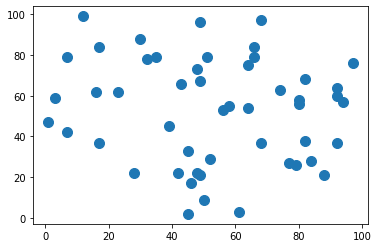

In [24]:
import matplotlib.pyplot as plt

rd_num = np.random.randint(0,100,(50,2))
plt.scatter(rd_num[:,0], rd_num[:, 1],s=100)
plt.show()

- 2차원 배열 rd_num의 0행부터 9행까지의 배열을 확인해보자.

In [25]:
print(rd_num[0:10])

[[61  3]
 [48 73]
 [97 76]
 [68 97]
 [56 53]
 [ 7 79]
 [92 60]
 [28 22]
 [94 57]
 [17 84]]


### linspace()
- linspace(): 일정한 간격으로 등분한 배열을 생성한다.

```
np.linspace(start,end,개수)
```

In [26]:
print(np.linspace(0,15,4))

[ 0.  5. 10. 15.]


- linspace()로 생성한 배열을 선형 그래프의 y축의 값을 생성하는데 사용해보자.

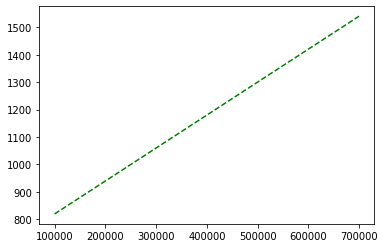

In [27]:
x = np.linspace(100000, 700000, 100)
y = 0.0012*x+700
plt.plot(x, y, ls='dashed', color='g')
plt.show()

### transpose()
- transpose(): 행과 열을 교체한다.  `배열명.T`도 가능하다.

```
np.transpose(배열명)
배열명.T
```

In [28]:
ar= np.arange(10).reshape(2,5)
print(ar)
print('\n\n===결과===')
print(ar.T)

[[0 1 2 3 4]
 [5 6 7 8 9]]


===결과===
[[0 5]
 [1 6]
 [2 7]
 [3 8]
 [4 9]]


## 배열의 유용한 함수들II
배열을 다룰 때 사용할 수 있는 몇 가지 유용한 함수를 살펴본다.
- where()
- max(), min()
- argmax(), argmin()
- sum(), mean(), median()
- var(), std()
- unique()
- abs()
- sin(), cos()
- dot()

### where()
where(): 조건에 만족하는 인덱스를 반환하거나, 조건에 따라 값을 다르게 적용시킨다.
```
np.where(조건, True일때 적용값, False일때 적용값)
```

In [29]:
a = np.arange(10)
print(a)
print('\n\n===결과===')
print(np.where(a%2==0)) # index 반환
print(np.where(a%2==0, "짝수", "홀수"))

[0 1 2 3 4 5 6 7 8 9]


===결과===
(array([0, 2, 4, 6, 8], dtype=int64),)
['짝수' '홀수' '짝수' '홀수' '짝수' '홀수' '짝수' '홀수' '짝수' '홀수']


### min(), max()
- np.min(): 최소값을 반환한다.
- np.max(): 최대값을 반환한다.

In [30]:
# 최소값, 최대값, 최소값 인덱스, 최대값 인덱스
ar = np.random.random((2,2,4))
print(ar)
print('\n\n===결과===')
print(np.min(ar))
print('\n\n===결과===')
print(np.max(ar[:1]))

[[[0.6061177  0.83880529 0.1011717  0.54520354]
  [0.93808257 0.19852505 0.96749806 0.78510894]]

 [[0.69675567 0.1504498  0.55783851 0.38441188]
  [0.83457396 0.74910996 0.34779154 0.54938944]]]


===결과===
0.10117169751548127


===결과===
0.9674980642203905


### argmin(), argmax()
- argmin(): 최소값 인덱스를 반환한다.
- argmax(): 최대값 인덱스를 반환한다.

In [31]:
print(np.argmin(ar))
print(np.argmax(ar))

2
6


### sum(), mean(), median()
- np.sum(배열명): 합을 반환한다.
- np.mean(배열명): 평균을 반환한다.
- np.median(배열명): 중간값을 반환한다.
이 때 옵션 axis를 통해 결과를 구하고자 하는 축을 명시해 줄 수 있다.
  - axis=0: 행
  - axis=1: 열


In [32]:
ar= np.arange(1,31,2).reshape(3,5)
print(ar)

print(np.sum(ar))
print(np.mean(ar))
print(np.median(ar))
print('\n\n===결과===')
print(np.sum(ar, axis=0))
print(np.sum(ar, axis=1))

[[ 1  3  5  7  9]
 [11 13 15 17 19]
 [21 23 25 27 29]]
225
15.0
15.0


===결과===
[33 39 45 51 57]
[ 25  75 125]


😄아래 값들의 평균을 백분율로 소수점 2자리까지 나타내시오. 소수점을 구할때는 round()함수를 사용하세요.


```python
np.array([0.83333333, 0.76404494, 0.85393258, 0.82022472, 0.86516854,0.80898876, 0.80898876, 0.7752809 , 0.84269663, 0.82022472])
```
- 데이터.round(n): 데이터를 소수점 n자리까지 나타낸다.
- np.round(데이터,n): 데이터를 소수점 n자리까지 나타낸다.

### var(), std()
- np.var(): 분산을 구한다.
- np.std(): 표준편차를 구한다.

In [33]:
ar=np.random.uniform(1,100,80)
print(ar)
print('\n\n===결과===')
print(np.var(ar))
print(np.std(ar))

[48.20100561 53.68043566 40.38380921 56.28735777 12.8755078  18.99698691
 14.94504078  6.90669026 54.54870215 78.18299476  1.4952705  91.28386665
 95.3146812  23.69294621 88.71504335 66.53871006 20.95985014 10.3520794
 15.79084146 90.42648677 72.1667987  97.49071665  9.99813826 62.28081919
 99.83411166 21.6360984  72.27583694 70.07146505 35.86212497 38.78077685
 18.62793211 50.88844288 49.98516201 58.23674345 32.11273613 48.96143801
 86.97391931  8.05264627 68.57391188 94.20372191 43.96083961 41.12346581
 31.31652879 47.60761811 83.29317164 90.8432965  10.23840721 76.00846073
 42.51203096 77.8346377  48.47063889 87.13632574 79.4586935  31.26035197
 13.66181605 43.88286325 21.02874185 25.85379471 78.01494075 26.46306034
  7.63988771 78.40146795 58.15613854 78.02366454 20.85968351 87.18709869
 37.64192214  9.0880777  10.64717863 12.76543021 38.09020354 42.1838504
 63.45525782 36.94329792 80.31848748 26.11790867 83.47922991 61.29978703
 34.72171979 92.34303518]


===결과===
809.713710832171

### unique()
- np.unique(): 중복값을 제거하여 1차원으로 반환한다.

In [34]:
ar = np.random.randint(-10, 10, (2,5))
print(ar)
print('\n\n===결과===')
print(np.unique(ar))

[[-2 -3  5  5  6]
 [ 8 -6  9  5 -1]]


===결과===
[-6 -3 -2 -1  5  6  8  9]


### abs()
- np.abs(): 절대값을 구한다.

In [35]:
ar = np.random.randint(-10, 10, (2,5))
print(ar)
print('\n\n===결과===')
print(np.abs(ar))

[[ -4   5   6  -2   5]
 [-10   9   6  -2  -2]]


===결과===
[[ 4  5  6  2  5]
 [10  9  6  2  2]]


### sin(), cos()
- np.sin(): sin 값을 구한다.
- np.cos(): cos 값을 구한다.
- 아래는 sin() 함수와 cos() 함수를 이용하여 그린 다중그래프이다.

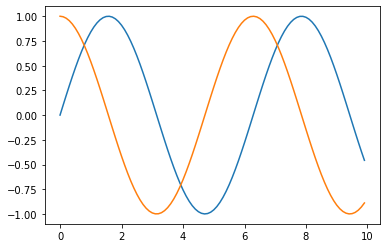

In [36]:
x = np.arange(0, 10, 0.1)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.show()

### dot()
- np.dot(a, b): 행렬의 곱(내적)을 구한다.
- a@b와 같이 `@` 기호로 나타내기도 한다.


- 두 행렬 A의 열의 개수와 행렬 B의 행의 개수가 같을 때 행렬 A의 제 i행의 각 원소와 행렬 B의 제 j열의 각 원소를 그 순서대로 곱하여 더한 것을 (i,j)원소로 하는 행렬을 두 행렬 A와 B의 곱이라고 한다.

```python
===a===
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]

===b===
[[ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]

```

```
[[1*3 + 2*5 + 3*7 + 4*9 + 5*11],
 [1*4 + 2*6 + 3*8 + 4*10 + 5*12]

 [6*3 + 7*5 + 8*7 + 9*9 +10*11],
 [6*4 + 7*6 + 8*8 + 9*10 + 10*12]]
```


In [37]:
a = np.arange(1,11,1).reshape(2,5)
b = np.arange(3,13,1).reshape(5,2)
print('===a===')
print(a)
print('\n\n===b===')
print(b)
print('\n\n===결과===')
print(a@b)

===a===
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]


===b===
[[ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]


===결과===
[[125 140]
 [300 340]]


<div align="center"><img src="https://haesunbyun.github.io/common/images/dot.png" style="width:400px;"></div>

### 파일저장 savetxt() , 읽어오기 loadtxt
- np.savetxt(파일명, 배열명): 배열을 텍스트 파일로 저장한다.
- np.loadtxt(파일명): 파일을 배열로 불러온다.


```python
np.savetxt('File123.txt', ar)
ar=np.loadtxt('File123.txt')
print(ar)
```



## Shallow Copy vs. Deep Copy
리스트, 딕셔너리, 집합, 배열 등의 데이터를 복사해서 복사된 데이터를 가지고 작업하기를 원할 때가 있다.
이들은 모두 mutable 데이터타입이고, 이들 데이터를 복사할 때의 문제점과 방법을 알아보자.

데이터를 복사하는 방법에는 세 가지가 있다.
- 일반복사: 원조변수와 복사변수가 같은 메모리를 참조
- Shallow Copy : 원조변수와 복사변수가 다른 메모리를 참조하나 2차원 이상인 경우 동일 메모리를 참조
- Deep Copy : 복사변수는 새로운 메모리를 할당하여 독립적으로 생성

### 일반복사

- `cp_a = a`와 같은 복사할 수 있다.
- 그러나 이와 같은 복사의 문제는 복사 배열의 데이터를 작업을 하면 원조 배열의 데이터도 똑같이 작업된다는 것이다.
- 그 이유는 복사변수와 원조변수가 같은 메모리 주소를 참조하기 때문이다.

<div align="center"><img src="https://haesunbyun.github.io/common/images/id3.png" style="width:400px;"></div>


- 다음 코드를 통해 확인해보자.
- 리스트, 딕셔너리, 집합, 배열 각각에 변수 a, b, c, d를  정의하였다.


In [38]:
a=[1,2,3,[10,20,30]] #리스트
b={'a':1, 'b':2, 'c':[10,20,30]} #딕셔너리
c={1,2,3,(10,20,30)} # 집합
d=np.array([[1,2,3],[10,20,30]])
print('Origin Data===================')
print(f'리스트: {a}')
print(f'딕셔너리: {b}')
print(f'집합: {c}')
print(f'배열: {d}')

Origin Data===================
리스트: [1, 2, 3, [10, 20, 30]]
딕셔너리: {'a': 1, 'b': 2, 'c': [10, 20, 30]}
집합: {1, 2, 3, (10, 20, 30)}
배열: [[ 1  2  3]
 [10 20 30]]


- 위에서 정의한 변수 a, b, c, d를 변수 a1, b1, c1,d1에 각각 복사하였다.

In [39]:
a1=a
b1=b
c1=c
d1=d
print('Copy Data=============')
print(f'리스트: {a1}')
print(f'딕셔너리: {b1}')
print(f'집합: {c1}')
print(f'배열: {d1}')

Copy Data=============
리스트: [1, 2, 3, [10, 20, 30]]
딕셔너리: {'a': 1, 'b': 2, 'c': [10, 20, 30]}
집합: {1, 2, 3, (10, 20, 30)}
배열: [[ 1  2  3]
 [10 20 30]]


- 복사한 변수 a1, b1, c1, d1의 값의 일부를 수정하였다.

In [40]:
a1[1]=100
b1['b']=100
c1.update((5,6,7))
d1[0][1]=100

- 원조변수 a, b, c, d와 복사변수 a1, b1, c1, d1을 출력해보면, `원조변수의 값까지 수정된 것을 확인할 수 있다.`

In [41]:
print('Copy Data 수정 후 origin data=============')
print(f'리스트: {a}')
print(f'딕셔너리: {b}')
print(f'집합: {c}')
print(f'배열: {d}')

print('\nCopy Data 수정 후 copy data=============')
print(f'리스트: {a1}')
print(f'딕셔너리: {b1}')
print(f'집합: {c1}')
print(f'배열: {d1}')

Copy Data 수정 후 origin data=============
리스트: [1, 100, 3, [10, 20, 30]]
딕셔너리: {'a': 1, 'b': 100, 'c': [10, 20, 30]}
집합: {1, 2, 3, 5, 6, 7, (10, 20, 30)}
배열: [[  1 100   3]
 [ 10  20  30]]

Copy Data 수정 후 copy data=============
리스트: [1, 100, 3, [10, 20, 30]]
딕셔너리: {'a': 1, 'b': 100, 'c': [10, 20, 30]}
집합: {1, 2, 3, 5, 6, 7, (10, 20, 30)}
배열: [[  1 100   3]
 [ 10  20  30]]


- 원조변수와 복사변수의 ID가 동일한지 알아보기 위해 is 연산자를 사용하여 확인해볼 수 있다.
- is 연산자는 메모리 주소 즉 객체의 ID가 동일한지 확인하는 연산자이다.
- 값이 동일한지 확인하는 것은 `==`를 사용하고, ID가 동일한지 확인하기 위해서는 is 연산자를 사용한다.

In [42]:
print(a is a1)
print(b is b1)
print(c is c1)
print(d is d1)

True
True
True
True


### copy() 메서드(shallow copy)


- 원조데이터가 수정되는 것을 방지하기 위해서는 copy() 메서드를 사용해보자.
- 리스트, 딕셔너리, 집합, 배열 각각에 변수 a, b, c, d를 정의하였다.

In [43]:
a=[1,2,3,[10,20,30]] #리스트
b={'a':1, 'b':2, 'c':[10,20,30]} #딕셔너리
c={1,2,3,(10,20,30)} # 집합
d=np.array([[1,2,3],[10,20,30]])
print('Origin Data===================')
print(f'리스트: {a}')
print(f'딕셔너리: {b}')
print(f'집합: {c}')
print(f'배열: {d}')

Origin Data===================
리스트: [1, 2, 3, [10, 20, 30]]
딕셔너리: {'a': 1, 'b': 2, 'c': [10, 20, 30]}
집합: {1, 2, 3, (10, 20, 30)}
배열: [[ 1  2  3]
 [10 20 30]]


- 이번에는 copy() 메서드를 사용하여 복사하였다.

In [44]:
a1=a.copy()
b1=b.copy()
c1=c.copy()
d1=d.copy()
print('Copy Data=============')
print(f'리스트: {a1}')
print(f'딕셔너리: {b1}')
print(f'집합: {c1}')
print(f'배열: {d1}')

Copy Data=============
리스트: [1, 2, 3, [10, 20, 30]]
딕셔너리: {'a': 1, 'b': 2, 'c': [10, 20, 30]}
집합: {1, 2, 3, (10, 20, 30)}
배열: [[ 1  2  3]
 [10 20 30]]


- 복사한 변수 a1, b1, c1, d1의 값의 일부를 수정하였다.

In [45]:
a1[1]=100
b1['b']=100
c1.update((5,6,7))
d1[0][1]=100

- 원조변수 a, b, c, d와 복사변수 a1, b1, c1, d1을 출력해보면, 원조변수의 값은 그대로 유지되고, 복사변수의 값만 수정된 것을 확인할 수 있다.

In [46]:
print('Copy Data 수정 후 origin data=============')
print(f'리스트: {a}')
print(f'딕셔너리: {b}')
print(f'집합: {c}')
print(f'배열: {d}')
print('\nCopy Data 수정 후 copy data=============')
print(f'리스트: {a1}')
print(f'딕셔너리: {b1}')
print(f'집합: {c1}')
print(f'배열: {d1}')

Copy Data 수정 후 origin data=============
리스트: [1, 2, 3, [10, 20, 30]]
딕셔너리: {'a': 1, 'b': 2, 'c': [10, 20, 30]}
집합: {1, 2, 3, (10, 20, 30)}
배열: [[ 1  2  3]
 [10 20 30]]

Copy Data 수정 후 copy data=============
리스트: [1, 100, 3, [10, 20, 30]]
딕셔너리: {'a': 1, 'b': 100, 'c': [10, 20, 30]}
집합: {1, 2, 3, 5, 6, 7, (10, 20, 30)}
배열: [[  1 100   3]
 [ 10  20  30]]


- 또한 원조변수 a, b, c, d와 복사변수 a1, b1, c1, d1가 서로 다른 ID를 갖고 있는 것을 확인할 수 있다.

In [47]:
print(a is a1)
print(b is b1)
print(c is c1)
print(d is d1)

False
False
False
False


- 하지만 결론부터 말하면 리스트안에 리스트이거나, 딕셔너리안에 리스트가 있는 경우 이를 수정했을 때 여전히 원조변수의 값이 같이 수정되는 문제가 발생한다.


```
a=[1,2,3,[10,20,30]]
b={'a':1, 'b':2, 'c':[10,20,30]}
c=np.array([{'a':[1,2]},{'b':[1,2]},{'c':[1,2]}])
```
a[3]의 값이 [10,20,30]리스트이다.

b['c']의 값이 [10,20,30]리스트이다.

c의 각 값들이 리스트이다.


In [48]:
a=[1,2,3,[10,20,30]]
b={'a':1, 'b':2, 'c':[10,20,30]}
c=np.array([{'a':[1,2]},{'b':[1,2]},{'c':[1,2]}])

In [49]:
a1=a.copy()
b1=b.copy()
c1=c.copy()

In [50]:
a1[3][0]='here'
b1['c'][0]='here'
c1[0]['a'][0]=100

<div align="center"><img src="https://haesunbyun.github.io/common/images/id4.png" width="350"></div>

- 원본 데이터와 복사 데이터가 모두 수정된 것을 확인할 수 있다.

In [51]:
print(a, a1)
print(b, b1)
print(c, c1)

[1, 2, 3, ['here', 20, 30]] [1, 2, 3, ['here', 20, 30]]
{'a': 1, 'b': 2, 'c': ['here', 20, 30]} {'a': 1, 'b': 2, 'c': ['here', 20, 30]}
[{'a': [100, 2]} {'b': [1, 2]} {'c': [1, 2]}] [{'a': [100, 2]} {'b': [1, 2]} {'c': [1, 2]}]


### Deepcopy()
- Deep copy는 복사변수의 값을 작업(수정, 삭제, 추가 등)해도 원본변수의 값이 작업되지 않는다.

In [52]:
import copy
a=[1,2,3,[10,20,30]]
b=copy.deepcopy(a)
b[3][0] = 100
print(a)
print(b)

[1, 2, 3, [10, 20, 30]]


[1, 2, 3, [100, 20, 30]]


## 마무리
- 데이터를 저장할 때에는 어떠한 자료구조에 저장할 것인지를 먼저 생각해야 한다.
- 자료구조에는 데이터의 수정, 삽입, 추가, 삭제가 자유로운 가변 데이터 타입과 한번 만들고 나면 수정, 삽입, 추가, 삭제 할 수 없는 불변 데이터 타입이 있다.
- 모듈 numpy는 규모 다차원 배열을 쉽고 빠르게 처리할 수 있도록 하는 파이썬 라이브러리이다.
- numpy 모듈의 배열(array)과 리스트는 벡터연산 제공 여부와 메모리 접근 속도 측면에서 많은 차이가 있다.
- shallow copy(얕은 복사)와 deep copy(깊은 복사)의 차이를 이해하고 복사하여 사용할 때 주의해야 한다.

---
<font color='Grey' size="4">
F37.101 컴퓨팅 기초: 처음 만나는 컴퓨팅(First Adventures in Computing)</font> 서울대학교 학부대학 변해선

---
